# FAANG Stock Market Prediction Based On News Sentiments Using Machine Learning

In [172]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


import pandas as pd
import numpy as np
from textblob import TextBlob
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Extraction

In [173]:
stock = pd.read_csv('FAANG_STOCK_NEWS.csv')

In [174]:
stock.shape

(500, 9)

In [175]:
stock.head()

,Unnamed: 0,ticker,date,time,headline,neg,neu,pos,compound
0,0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [176]:
#drop unnamed: 0
stock = stock.drop('Unnamed: 0', 1)
stock.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [177]:
stock.describe()

,neg,neu,pos,compound
count,500.000000,500.000000,500.000000,500.000000
mean,0.056344,0.822262,0.121406,0.100331
std,0.111799,0.171060,0.157284,0.346107
min,0.000000,0.306000,0.000000,-0.743000
25%,0.000000,0.706750,0.000000,0.000000
50%,0.000000,0.821000,0.000000,0.000000
75%,0.000000,1.000000,0.231000,0.307000
max,0.519000,1.000000,0.694000,0.941300


In [178]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    500 non-null    object 
 1   date      500 non-null    object 
 2   time      500 non-null    object 
 3   headline  500 non-null    object 
 4   neg       500 non-null    float64
 5   neu       500 non-null    float64
 6   pos       500 non-null    float64
 7   compound  500 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


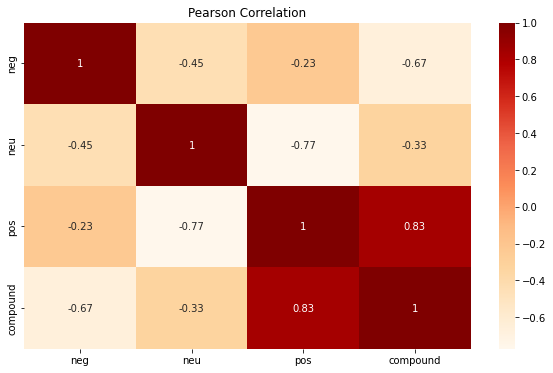

In [179]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(stock.corr(), annot = True, cmap = 'OrRd')
plt.title("Pearson Correlation")
plt.show()

## Text Processing

In [180]:
#selection data
headline = stock[['ticker', 'headline']]
headline.head()

,ticker,headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...
2,FB,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...


In [181]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
headline['clean_headline'] = headline['headline'].apply(lambda x:remove_punctuation(x))
headline.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\630229650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['clean_headline'] = headline['headline'].apply(lambda x:remove_punctuation(x))


,ticker,headline,clean_headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...


In [182]:
#setting lower case
headline['headline_lower'] = headline['clean_headline'].apply(lambda x: x.lower())
headline.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\3175767707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_lower'] = headline['clean_headline'].apply(lambda x: x.lower())


,ticker,headline,clean_headline,headline_lower
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...


In [183]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
headline['headline_tokenied'] = headline['headline_lower'].apply(lambda x: tokenization(x))
headline.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\2664959738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_tokenied'] = headline['headline_lower'].apply(lambda x: tokenization(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...


In [184]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [185]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
headline['no_stopwords']= headline['headline_tokenied'].apply(lambda x:remove_stopwords(x))
headline.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\244815608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['no_stopwords']= headline['headline_tokenied'].apply(lambda x:remove_stopwords(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied,no_stopwords
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...


In [186]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

headline['headline_stemmed'] = headline['no_stopwords'].apply(lambda x: stemming(x))
headline.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\3886509765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_stemmed'] = headline['no_stopwords'].apply(lambda x: stemming(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied,no_stopwords,headline_stemmed
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...


## Sentiment Analysis

In [187]:
#selection data
df = headline[['ticker', 'clean_headline']]
df.head()

,ticker,clean_headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1Facebook wraps up deals with Australia...
2,FB,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...


In [188]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [189]:
#apply function to data 
df['subjectivity'] = df['clean_headline'].apply(getSubjectivity)
df['polarity'] = df['clean_headline'].apply(getPolarity)
df.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\2077207536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = df['clean_headline'].apply(getSubjectivity)
C:\Users\John\AppData\Local\Temp\ipykernel_1284\2077207536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['clean_headline'].apply(getPolarity)


,ticker,clean_headline,subjectivity,polarity
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667


In [190]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df['sentiment'] = df['polarity'].apply(getSentiment)
df.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\2914808233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['polarity'].apply(getSentiment)


,ticker,clean_headline,subjectivity,polarity,sentiment
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000,Neutral
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000,Neutral
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000,Neutral
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000,Neutral
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667,Positive


In [191]:
df['sentiment'].value_counts()

Neutral     272
Positive    173
Negative     55
Name: sentiment, dtype: int64

In [192]:
#get headline of sentiment neutral
nl_headline = df[df.sentiment == 'Neutral']
nl_headline = nl_headline['clean_headline']
nl_headline.head()

0    2 Growth Stocks to Buy Hand Over Fist If the M...
1    UPDATE 1Facebook wraps up deals with Australia...
2    Facebook wraps up deals with Australian media ...
3    Facebook wraps up deals with Australia media f...
7    Facebook says Wall Street Journal report alleg...
Name: clean_headline, dtype: object

In [193]:
#get headline of sentiment positive
p_headline = df[df.sentiment == 'Positive']
p_headline = p_headline['clean_headline']
p_headline.head()

4     Facebook overpaid FTC fine as quid pro quo to ...
5     Is GBTC Stock A Good Buy As Bitcoin Slumps Aft...
6     Facebook Oversight Board to Review Special Rul...
8      These Are The 5 Best Stocks To Buy And Watch Now
13    Top Research Reports for Facebook Walmart  Nov...
Name: clean_headline, dtype: object

In [194]:
#get headline of sentiment negative
n_headline = df[df.sentiment == 'Negative']
n_headline = n_headline['clean_headline']
n_headline.head()

22    Facebook spent over 13 billion on safety secur...
23    Facebook spent over 13 bln on safety security ...
28    Facebook Says It Has Spent 13 Billion on Safet...
32    Why Apple Facebook Amazon and Other Tech Stock...
39    TikTok Parent Forced To Restrict Screen Time F...
Name: clean_headline, dtype: object

In [195]:
# Define a function which can be applied to calculate the sentiment score 
def score(x):
    return TextBlob(x).sentiment  
 
df['score'] = df['clean_headline'].apply(score)
df.score.head()

C:\Users\John\AppData\Local\Temp\ipykernel_1284\819442832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['clean_headline'].apply(score)


0                   (0.0, 0.0)
1                   (0.0, 0.0)
2                   (0.0, 0.0)
3                   (0.0, 0.0)
4    (0.4166666666666667, 0.5)
Name: score, dtype: object

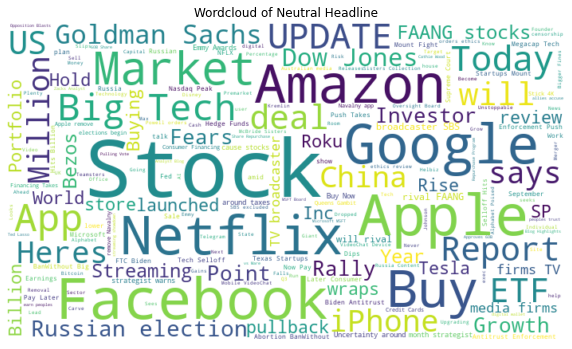

In [196]:
neutral = " ".join(df[df.sentiment == 'Neutral']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Headline")
plt.axis('off')
plt.show()

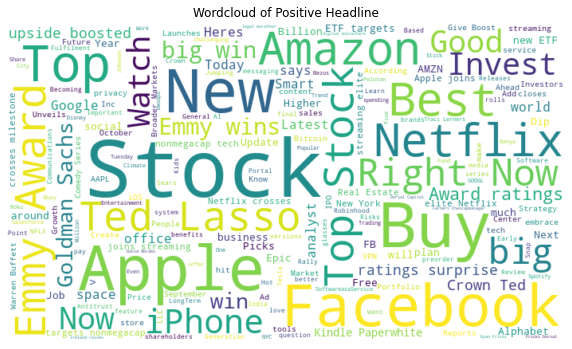

In [197]:
positive = " ".join(df[df.sentiment == 'Positive']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Headline")
plt.axis('off')
plt.show()

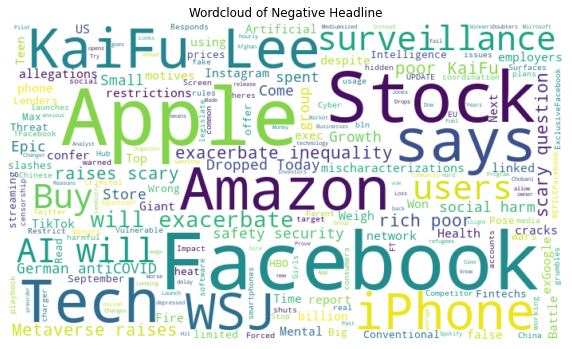

In [198]:
negative = " ".join(df[df.sentiment == 'Negative']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Headline")
plt.axis('off')
plt.show()

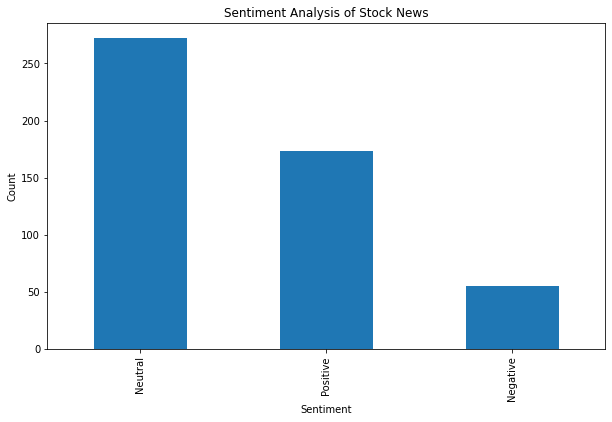

In [199]:
#visualize sentiment
df['sentiment'].value_counts()

plt.figure(figsize = (10,6))
plt.title("Sentiment Analysis of Stock News")
plt.xlabel("Sentiment")
plt.ylabel("Count")

df['sentiment'].value_counts().plot(kind = 'bar')
df2 = df.copy()
df2.insert(2, "date", stock['date'], True)
plt.show()

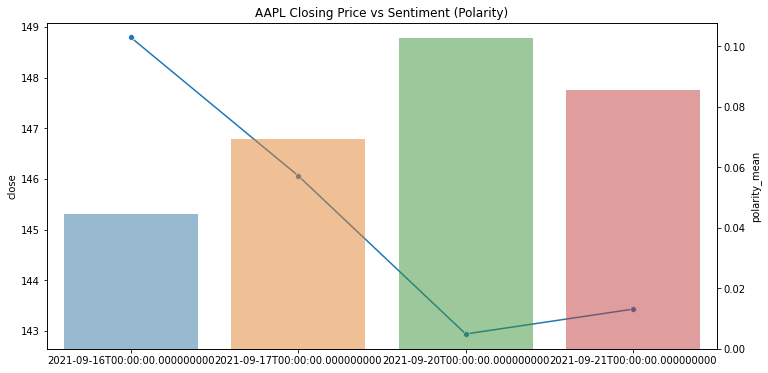

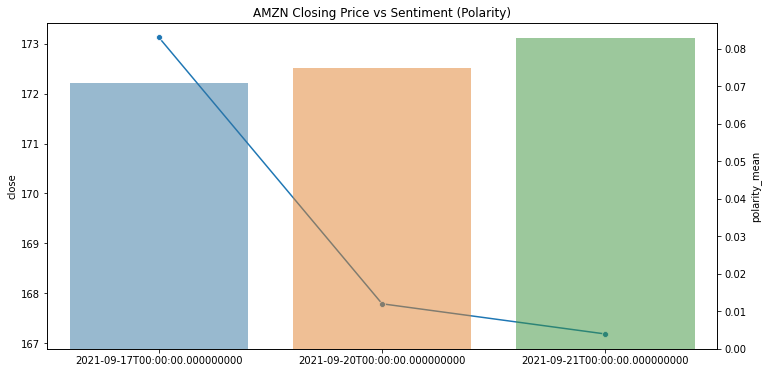

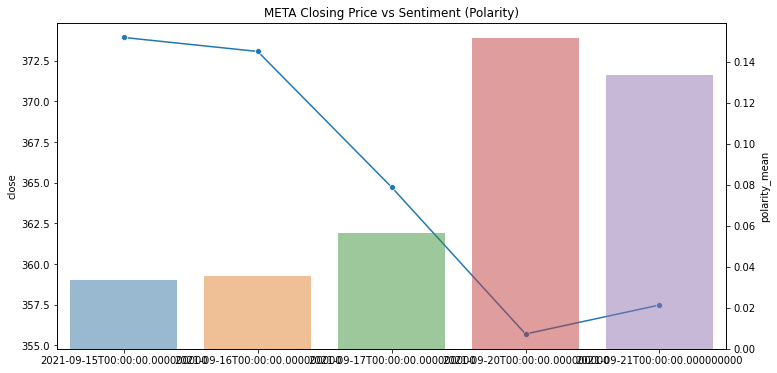

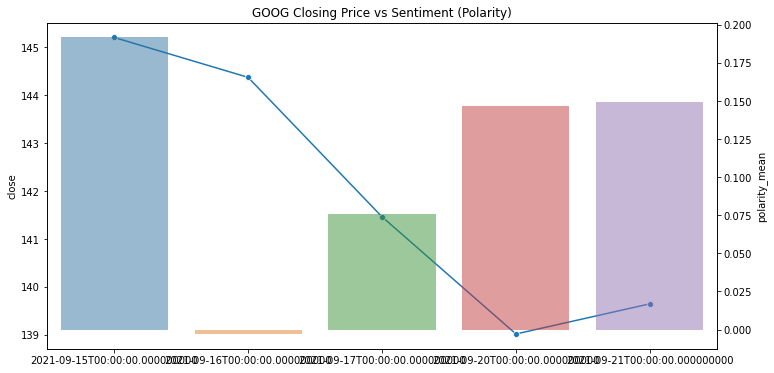

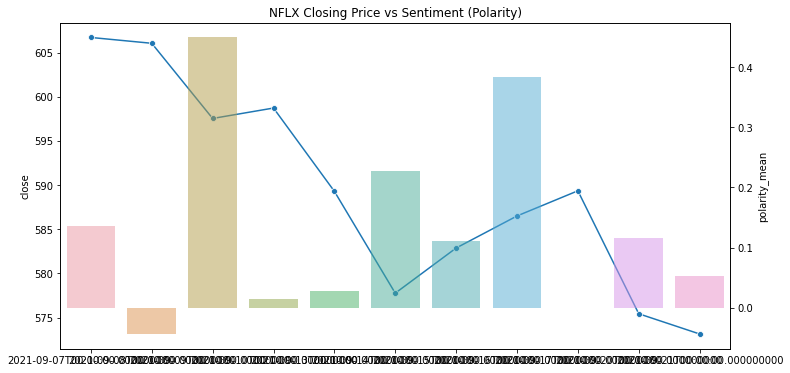

In [200]:
from pandas import read_csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df2['date'] = pd.to_datetime(df2['date'])
aapl_stock = read_csv('AAPL.csv')
amzn_stock = read_csv('AMZN.csv')
meta_stock = read_csv('META.csv')
goog_stock = read_csv('GOOG.csv')
nflx_stock = read_csv('NFLX.csv')

aapl_df = df2[df2['ticker'] == 'AAPL']
amzn_df = df2[df2['ticker'] == 'AMZN']
meta_df = df2[df2['ticker'] == 'FB']
goog_df = df2[df2['ticker'] == 'GOOGL']
nflx_df = df2[df2['ticker'] == 'NFLX']

final_aapl = pd.DataFrame()
final_amzn = pd.DataFrame()
final_meta = pd.DataFrame()
final_goog = pd.DataFrame()
final_nflx = pd.DataFrame()
ctr = 0
#AAPL
for idx, data in aapl_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = aapl_df[aapl_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_aapl = final_aapl.append(filtered_dataframe)

#AMZN
for idx, data in amzn_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = amzn_df[amzn_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_amzn = final_amzn.append(filtered_dataframe)

#META
for idx, data in meta_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = meta_df[meta_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_meta = final_meta.append(filtered_dataframe)

#GOOG
for idx, data in goog_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = goog_df[goog_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_goog = final_goog.append(filtered_dataframe)

#NFLX
for idx, data in nflx_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = nflx_df[nflx_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_nflx = final_nflx.append(filtered_dataframe)


final_aapl = final_aapl.reset_index(drop=True)
final_amzn = final_amzn.reset_index(drop=True)
final_meta = final_meta.reset_index(drop=True)
final_goog = final_goog.reset_index(drop=True)
final_nflx = final_nflx.reset_index(drop=True)

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = final_aapl['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_aapl, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("AAPL Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_amzn['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_amzn, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("AMZN Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_meta['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_meta, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("META Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_goog['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_goog, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("GOOG Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_nflx['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_nflx, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("NFLX Closing Price vs Sentiment (Polarity)")
plt.show()



In [201]:
#group ticker & sentiment
ticker_sentiment = df.groupby(['ticker', 'sentiment']).size().reset_index(name = 'Count')
print(ticker_sentiment)

   ticker sentiment  Count
0    AAPL  Negative     11
1    AAPL   Neutral     57
2    AAPL  Positive     32
3    AMZN  Negative     12
4    AMZN   Neutral     50
5    AMZN  Positive     38
6      FB  Negative     18
7      FB   Neutral     50
8      FB  Positive     32
9   GOOGL  Negative     10
10  GOOGL   Neutral     58
11  GOOGL  Positive     32
12   NFLX  Negative      4
13   NFLX   Neutral     57
14   NFLX  Positive     39


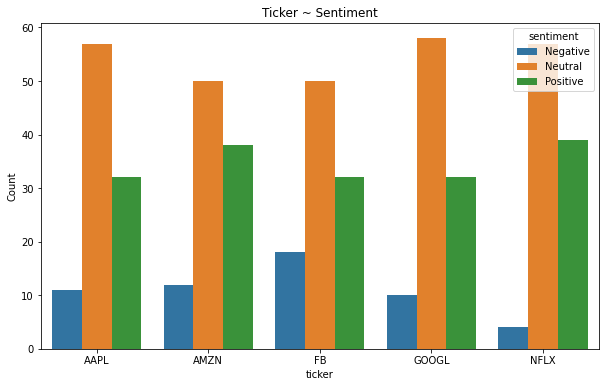

In [202]:
#visualize ticker ~ sentiment
plt.figure(figsize = (10,6))
sns.barplot(x = 'ticker', y = 'Count', hue = 'sentiment', data = ticker_sentiment)
plt.title("Ticker ~ Sentiment")
plt.show()

In [203]:
df

,ticker,clean_headline,subjectivity,polarity,sentiment,score
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000,Neutral,"(0.0, 0.0)"
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000,Neutral,"(0.0, 0.0)"
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000,Neutral,"(0.0, 0.0)"
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000,Neutral,"(0.0, 0.0)"
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667,Positive,"(0.4166666666666667, 0.5)"
...,...,...,...,...,...,...
495,GOOGL,10 Cheap Space Stocks Popular On Reddit,0.8,0.500000,Positive,"(0.5, 0.8)"
496,GOOGL,25 Largest ETFs by Assets Under Management,0.0,0.000000,Neutral,"(0.0, 0.0)"
497,GOOGL,Startup aims to help busy moms with personal a...,0.3,0.050000,Positive,"(0.05, 0.3)"
498,GOOGL,Tech Giants Used Loopholes to Duck Merger Revi...,0.0,0.000000,Neutral,"(0.0, 0.0)"


In [204]:
df = pd.read_csv('combined.csv')
df

,Label,ticker,date,time,headline,close
0,1,FB,22/09/2021,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,357.480011
1,1,FB,22/09/2021,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,357.480011
2,1,FB,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,357.480011
3,1,FB,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,357.480011
4,1,FB,21/09/2021,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,357.480011
...,...,...,...,...,...,...
495,1,GOOGL,15/09/2021,05:25PM,10 Cheap Space Stocks Popular On Reddit,145.205994
496,1,GOOGL,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,145.205994
497,1,GOOGL,15/09/2021,04:21PM,Startup aims to help busy moms with personal a...,145.205994
498,1,GOOGL,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,145.205994


In [205]:
df.groupby('ticker').size()

ticker
AAPL     100
AMZN     100
FB       100
GOOGL    100
NFLX     100
dtype: int64

In [206]:
apple = df.loc[(df['ticker'] == 'AAPL')]
apple

,Label,ticker,date,time,headline,close
100,1,AAPL,22/09/2021,06:43AM,Stop using Chinese smartphones over hidden cen...,143.429993
101,1,AAPL,22/09/2021,05:51AM,iOS 15: Flagship SharePlay feature is on its w...,143.429993
102,1,AAPL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,143.429993
103,1,AAPL,21/09/2021,05:48PM,Epic Won a Small Battle With Apple. Which Tech...,143.429993
104,1,AAPL,21/09/2021,05:40PM,At What Point Does an Individual Stock Become ...,143.429993
...,...,...,...,...,...,...
195,1,AAPL,16/09/2021,05:05PM,Which iPhone 13 should you buy?,148.789993
196,1,AAPL,16/09/2021,04:16PM,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,148.789993
197,1,AAPL,16/09/2021,02:48PM,iPhone 13 Is Already Recording Early Strong Sa...,148.789993
198,1,AAPL,16/09/2021,02:06PM,Altcoins Like Bitcoin Cash and Litecoin Were T...,148.789993


In [207]:
amazon = df.loc[(df['ticker'] == 'AMZN')]
amazon

,Label,ticker,date,time,headline,close
200,0,AMZN,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,167.181503
201,0,AMZN,22/09/2021,07:23AM,"Affirm: Buy Now, Get Paid Later?",167.181503
202,0,AMZN,22/09/2021,06:32AM,"Banza, Beyond Meat team up as plant-based meat...",167.181503
203,0,AMZN,22/09/2021,06:00AM,September Sell-Off: Best Stocks to Buy Now,167.181503
204,0,AMZN,22/09/2021,05:51AM,"Got $25,000? These 5 Stocks Can Double Your Mo...",167.181503
...,...,...,...,...,...,...
295,1,AMZN,17/09/2021,09:16AM,Amazon Facing Teamsters Unionization Push in C...,173.126007
296,1,AMZN,17/09/2021,09:06AM,HBO Max slashes prices in limited offer as str...,173.126007
297,1,AMZN,17/09/2021,09:00AM,HBO Max slashes prices in limited offer as str...,173.126007
298,1,AMZN,17/09/2021,07:06AM,Exclusive-Amazon faces Teamsters union drive a...,173.126007


In [208]:
fb = df.loc[(df['ticker'] == 'FB')]
fb

,Label,ticker,date,time,headline,close
0,1,FB,22/09/2021,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,357.480011
1,1,FB,22/09/2021,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,357.480011
2,1,FB,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,357.480011
3,1,FB,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,357.480011
4,1,FB,21/09/2021,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,357.480011
...,...,...,...,...,...,...
95,1,FB,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,373.920013
96,1,FB,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,373.920013
97,1,FB,15/09/2021,02:26PM,Facebooks Risks for Young People Add to Bipart...,373.920013
98,1,FB,15/09/2021,01:51PM,When will Amazon stock skyrocket again?,373.920013


In [209]:
google = df.loc[(df['ticker'] == 'GOOGL')]
google

,Label,ticker,date,time,headline,close
400,1,GOOGL,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,139.646500
401,1,GOOGL,22/09/2021,07:22AM,"5 Unstoppable Trends to Invest $10,000 in Righ...",139.646500
402,1,GOOGL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,139.646500
403,1,GOOGL,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,139.646500
404,1,GOOGL,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,139.646500
...,...,...,...,...,...,...
495,1,GOOGL,15/09/2021,05:25PM,10 Cheap Space Stocks Popular On Reddit,145.205994
496,1,GOOGL,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,145.205994
497,1,GOOGL,15/09/2021,04:21PM,Startup aims to help busy moms with personal a...,145.205994
498,1,GOOGL,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,145.205994


In [210]:
netflix = df.loc[(df['ticker'] == 'NFLX')]
netflix

,Label,ticker,date,time,headline,close
300,0,NFLX,22/09/2021,07:07AM,Here's Why Smart Investors Are Buying Netflix ...,573.140015
301,0,NFLX,22/09/2021,06:06AM,Netflix announces deal to buy Roald Dahl Story...,573.140015
302,0,NFLX,22/09/2021,05:38AM,"Matilda, Willy Wonka join Netflix catalog as i...",573.140015
303,0,NFLX,22/09/2021,12:20AM,Philippines lower house approves VAT for big t...,573.140015
304,0,NFLX,21/09/2021,09:47PM,"Hedge Funds Are Buying Netflix, Inc. (NFLX)",573.140015
...,...,...,...,...,...,...
395,1,NFLX,07/09/2021,09:51AM,25 Happiest Countries in the World,606.710022
396,1,NFLX,07/09/2021,08:45AM,Netflix Stock Attracts Big Money,606.710022
397,1,NFLX,07/09/2021,08:27AM,"Five Top Stock Gainers for Tuesday: Match, Spo...",606.710022
398,1,NFLX,07/09/2021,04:40AM,"Best free VPN for secure browsing on PC, iPhon...",606.710022


In [211]:
# resetting index

apple.reset_index(inplace = True)
amazon.reset_index(inplace = True)
fb.reset_index(inplace = True)
google.reset_index(inplace = True)
netflix.reset_index(inplace = True)


### Combining News Headlines as one block feed

In [212]:
#Combine the top news headline:

headline= []

for row  in range (0, len(apple.index)):
    headline.append("".join(str(x) for x in apple.iloc[row, 4]))

In [213]:
headline

['06:43AM',
 '05:51AM',
 '05:01AM',
 '05:48PM',
 '05:40PM',
 '05:31PM',
 '02:53PM',
 '02:21PM',
 '02:02PM',
 '01:04PM',
 '01:00PM',
 '12:15PM',
 '12:10PM',
 '11:43AM',
 '11:32AM',
 '10:43AM',
 '10:42AM',
 '10:27AM',
 '10:19AM',
 '10:02AM',
 '10:01AM',
 '09:55AM',
 '09:27AM',
 '08:57AM',
 '08:35AM',
 '07:53AM',
 '07:52AM',
 '04:21AM',
 '04:00AM',
 '03:58AM',
 '05:54PM',
 '05:49PM',
 '04:51PM',
 '04:37PM',
 '04:36PM',
 '03:44PM',
 '02:53PM',
 '01:55PM',
 '01:30PM',
 '01:21PM',
 '01:06PM',
 '12:24PM',
 '10:26AM',
 '10:26AM',
 '10:22AM',
 '10:10AM',
 '09:54AM',
 '09:24AM',
 '09:14AM',
 '09:08AM',
 '08:23AM',
 '08:17AM',
 '08:00AM',
 '06:35AM',
 '06:06AM',
 '01:38AM',
 '12:54AM',
 '12:46AM',
 '11:12PM',
 '12:39PM',
 '12:17PM',
 '09:21AM',
 '07:44AM',
 '06:32AM',
 '04:58PM',
 '02:35PM',
 '09:43AM',
 '07:30AM',
 '08:07PM',
 '06:00PM',
 '05:59PM',
 '03:02PM',
 '02:24PM',
 '01:54PM',
 '01:33PM',
 '01:26PM',
 '01:06PM',
 '12:55PM',
 '12:23PM',
 '11:56AM',
 '11:54AM',
 '11:20AM',
 '10:54AM',
 '10

### Data Cleaning

In [214]:
# clean the data:
clean_headline = []

# Removing breaks and slashes
for i in range (0, len(headline)):
    clean_headline.append(re.sub("b[(')]", '', headline[i])) # remove b'
    clean_headline[i] = re.sub('b[(")]', '', clean_headline[i]) # remove b"
    clean_headline[i] = re.sub("\'", '', clean_headline[i]) # remove \'

In [215]:
clean_headline[0]

'06:43AM'

### Data after Cleaning

In [216]:
# Add the clean headline to the merge data:

apple['clean_headline'] = clean_headline

apple

C:\Users\John\AppData\Local\Temp\ipykernel_1284\116562127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['clean_headline'] = clean_headline


,index,Label,ticker,date,time,headline,close,clean_headline
0,100,1,AAPL,22/09/2021,06:43AM,Stop using Chinese smartphones over hidden cen...,143.429993,06:43AM
1,101,1,AAPL,22/09/2021,05:51AM,iOS 15: Flagship SharePlay feature is on its w...,143.429993,05:51AM
2,102,1,AAPL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,143.429993,05:01AM
3,103,1,AAPL,21/09/2021,05:48PM,Epic Won a Small Battle With Apple. Which Tech...,143.429993,05:48PM
4,104,1,AAPL,21/09/2021,05:40PM,At What Point Does an Individual Stock Become ...,143.429993,05:40PM
...,...,...,...,...,...,...,...,...
95,195,1,AAPL,16/09/2021,05:05PM,Which iPhone 13 should you buy?,148.789993,05:05PM
96,196,1,AAPL,16/09/2021,04:16PM,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,148.789993,04:16PM
97,197,1,AAPL,16/09/2021,02:48PM,iPhone 13 Is Already Recording Early Strong Sa...,148.789993,02:48PM
98,198,1,AAPL,16/09/2021,02:06PM,Altcoins Like Bitcoin Cash and Litecoin Were T...,148.789993,02:06PM


### Subjectivity and Polarity

In [217]:
# get subjectivity:

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get polarity:

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [218]:
apple['Subjectivity'] = apple['headline'].apply(get_subjectivity)

apple['Polarity'] = apple['headline'].apply(get_polarity)

C:\Users\John\AppData\Local\Temp\ipykernel_1284\3162237021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Subjectivity'] = apple['headline'].apply(get_subjectivity)
C:\Users\John\AppData\Local\Temp\ipykernel_1284\3162237021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Polarity'] = apple['headline'].apply(get_polarity)


# Sentiment scores using SentimentIntensityAnalyzer

In [219]:
# create function to get the sentiment score:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
apple['clean_headline']

0     06:43AM
1     05:51AM
2     05:01AM
3     05:48PM
4     05:40PM
       ...   
95    05:05PM
96    04:16PM
97    02:48PM
98    02:06PM
99    01:20PM
Name: clean_headline, Length: 100, dtype: object

In [ ]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(apple['clean_headline'])):
    SIA= getSIA(apple['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [ ]:
apple['compound']= compound
apple['neg']= neg
apple['pos']=pos
apple['neu']=neu

apple

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_26816/4130477775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['compound']= compound
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_26816/4130477775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['neg']= neg
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_26816/4130477775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,index,Label,ticker,date,time,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,100,1,AAPL,22/09/2021,06:43AM,Stop using Chinese smartphones over hidden cen...,143.429993,06:43AM,0.166667,-0.083333,0.0,0.0,0.0,1.0
1,101,1,AAPL,22/09/2021,05:51AM,iOS 15: Flagship SharePlay feature is on its w...,143.429993,05:51AM,0.454545,0.136364,0.0,0.0,0.0,1.0
2,102,1,AAPL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,143.429993,05:01AM,0.300000,0.250000,0.0,0.0,0.0,1.0
3,103,1,AAPL,21/09/2021,05:48PM,Epic Won a Small Battle With Apple. Which Tech...,143.429993,05:48PM,0.450000,-0.037500,0.0,0.0,0.0,1.0
4,104,1,AAPL,21/09/2021,05:40PM,At What Point Does an Individual Stock Become ...,143.429993,05:40PM,0.250000,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,1,AAPL,16/09/2021,05:05PM,Which iPhone 13 should you buy?,148.789993,05:05PM,0.000000,0.000000,0.0,0.0,0.0,1.0
96,196,1,AAPL,16/09/2021,04:16PM,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,148.789993,04:16PM,0.000000,0.000000,0.0,0.0,0.0,1.0
97,197,1,AAPL,16/09/2021,02:48PM,iPhone 13 Is Already Recording Early Strong Sa...,148.789993,02:48PM,0.516667,0.266667,0.0,0.0,0.0,1.0
98,198,1,AAPL,16/09/2021,02:06PM,Altcoins Like Bitcoin Cash and Litecoin Were T...,148.789993,02:06PM,0.000000,0.000000,0.0,0.0,0.0,1.0


In [ ]:
#Create new dataframe contain relevants features:

df= apple[['Label', 'close', 'Subjectivity','Polarity','compound','neg','pos', 'neu']]
df

,Label,close,Subjectivity,Polarity,compound,neg,pos,neu
0,1,143.429993,0.166667,-0.083333,0.0,0.0,0.0,1.0
1,1,143.429993,0.454545,0.136364,0.0,0.0,0.0,1.0
2,1,143.429993,0.300000,0.250000,0.0,0.0,0.0,1.0
3,1,143.429993,0.450000,-0.037500,0.0,0.0,0.0,1.0
4,1,143.429993,0.250000,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
95,1,148.789993,0.000000,0.000000,0.0,0.0,0.0,1.0
96,1,148.789993,0.000000,0.000000,0.0,0.0,0.0,1.0
97,1,148.789993,0.516667,0.266667,0.0,0.0,0.0,1.0
98,1,148.789993,0.000000,0.000000,0.0,0.0,0.0,1.0


### Linear Discriminant Analysis Model

In [ ]:
#create the feature data set:
X=df

X=np.array(X.drop(['Label'],1))

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_26816/1607044276.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(X.drop(['Label'],1))


In [ ]:
#create the target data set:

y= np.array(df['Label'])

In [ ]:
# Split the data:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

In [ ]:
#create and train the model:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model.predict(x_test)

predict

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.69      0.64      0.67        14

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.57      0.55      0.56        20



### Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

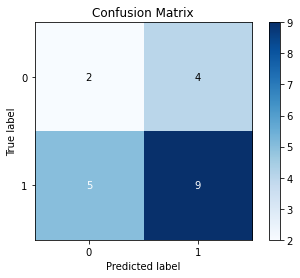

In [ ]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,predict)